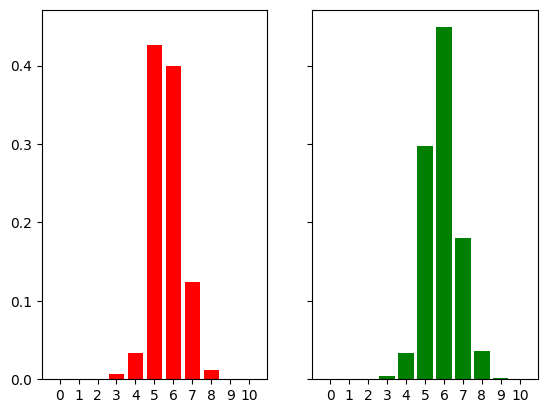

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

os.chdir( "/home/lucasfuzato/CODING/WINE" )

# wine datasets
red_wine = pd.read_csv( "DATA/winequality-red.csv" , delimiter = ";" )
white_wine = pd.read_csv( "DATA/winequality-white.csv" , delimiter = ";" )

# quality distribution
fig , ( ax_1 , ax_2 ) = plt.subplots( ncols = 2 , sharey = True )
colors = [ "red" , "green" ]
axs    = [ ax_1 , ax_2 ]
data   = [ red_wine[ "quality" ] , white_wine[ "quality" ] ]

for color , ax , ser in zip( colors , axs , data ):
    
    # arr = np.zeros( ( len( ser ) , 11 ) )
    # # arr[ : , ser.to_numpy() ] = 1
    heights = np.array( [ sum( map( int , ( ser == x ) ) ) for x in range( 11 ) ] )
    heights = heights/heights.sum()
    
    ax.bar( range( 11 ) , heights , color = color )
    ax.set_xticks( range( 11 ) )
plt.show()


In [4]:
# a good wine has a score of at least 7
is_good = lambda x : int( x >= 7 )

# red metrics
red_qual = red_wine[ "quality" ].to_numpy()
red_total = len( red_qual )
red_good = sum( map( is_good , red_qual ) )

# white metrics
white_qual = white_wine[ "quality" ].to_numpy()
white_total = len( white_qual )
white_good = sum( map( is_good , white_qual ) )

# probabilities
good_prob = ( white_good + red_good )/( red_total + white_total )
redg_prob = red_good/red_total
whiteg_prob = white_good/white_total

# logs ( probabilities and lift )
foo = lambda x : f"{100*x:3f}%"
print( f"P( good ) = {foo( good_prob)}" )
print( f"\nP( good | red ) = {foo( redg_prob)}")
print( f"Lift( red => good ) = { ( redg_prob/good_prob ):2f}")
print( f"\nP( good | white ) = { foo( whiteg_prob ) }")
print( f"Lift( white => good ) = { ( whiteg_prob/good_prob ):2f}")

P( good ) = 19.655225%

P( good | red ) = 13.570982%
Lift( red => good ) = 0.690452

P( good | white ) = 21.641486%
Lift( white => good ) = 1.101055
